<h1>Stochastic Model Fitting</h1>

In this python notebook, we will be using historical price data to fit stochastic models such as standard Geometric Brownian Motion (GBM), Vasicek, Cox-Ingersoll-Ross(CIR), as well as a stochastic volatility model - Heston's model.

<h3> 1.0 Importing necessary packages </h3>

Packages:

- yfinance: For downloading data
- stochastic_process_simulation: For fitting models
- data_processing : Miscellaneous data functions

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import yfinance as yf
from src.stochastic_process_simulation import *
from src.data_processing import *

<h3> 2.0 Download Data</h3>

In the code chunk below, we will be using <code>yfinance</code> package to download the historical price data. In this example we will be using SPX.

[*********************100%%**********************]  1 of 1 completed


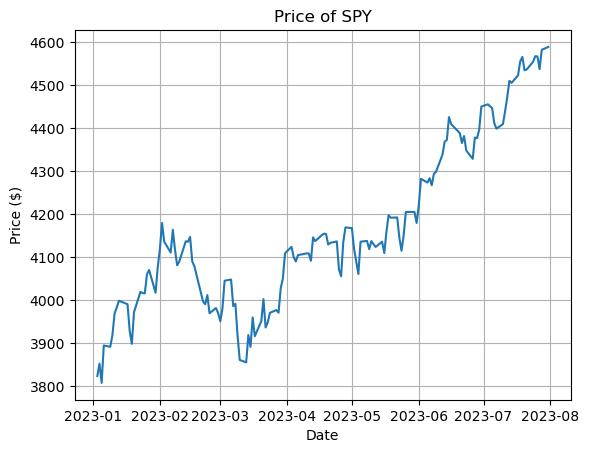

In [2]:
# Define the ticker symbol
ticker_symbol = "^GSPC"  # S&P 500's ticker symbol on Yahoo Finance
start_date = '2023-01-01'
end_date = '2023-08-01'
# Fetch the data
data = yf.download(ticker_symbol, start=start_date, end=end_date)
# Take adjusted closing price
prices = data['Adj Close'].values

# Plot prices
plt.plot(data['Adj Close'])
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Price of SPY")
plt.grid()

<h3> 3.0 Simulating SPY with GBM </h3>
We will first be fitting the standard GBM process to SPX's historical prices. In the <code> Stochastic_Process_Fitting</code>, it has three methods of fitting the parameters:

- **method of moments**
- **least squares estimation (LSE)**
- **maximum likelihood estimation (MLE)** 


In [3]:
# Initialising and fitting model
spx_process = GBM(initial_price = prices[0], tau = len(prices)/252, n_steps = len(prices))

# Fitting by all different methods
fitting_methods = ['moments', 'least square', 'mle']
params = {method: spx_process.fit(prices, method = method) for method in fitting_methods}

for method in fitting_methods:
    print(f'{method} Parameters: mu = {params[method][0]}, {params[method][1]}')

moments Parameters: mu = 0.0013131555592490486, 0.008651410064775596
least square Parameters: mu = 0.04999984875188306, 0.020000271081120596
mle Parameters: mu = 0.32129078930672095, 0.13717130231359742


<h3> 3.1 Simmulating and Plotting SPX</h3>

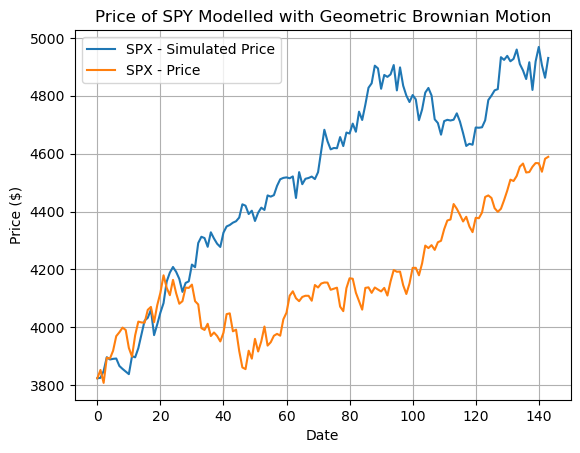

In [7]:
# least square tends to have the best fitting
spx_process.fit(prices, method = 'mle')

# Plotting simulated GBM process
spx_process.simulate()
spx_simulation = spx_process.get_simulation()

# Plotting simulation
plt.plot(spx_simulation, label = 'SPX - Simulated Price')
plt.plot(prices, label = 'SPX - Price')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Price of SPY Modelled with Geometric Brownian Motion")
plt.grid()

<h2> 4.0 Simulating SPY's Volatility with CIR Process</h2>

moments Parameters: kappa = 0.22672649220832863, theta = 0.03201753962506816, sigma = 0.013014902509837197
least square Parameters: kappa = 0.10000162110978454, theta = 0.050013302532590204, sigma = 0.020008227146759136
mle Parameters: kappa = 0.195345447984275, theta = 0.15745349762678942, sigma = 0.007066017790137356
kappa: 0.195345447984275, theta: 0.15745349762678942, sigma: 0.007066017790137356


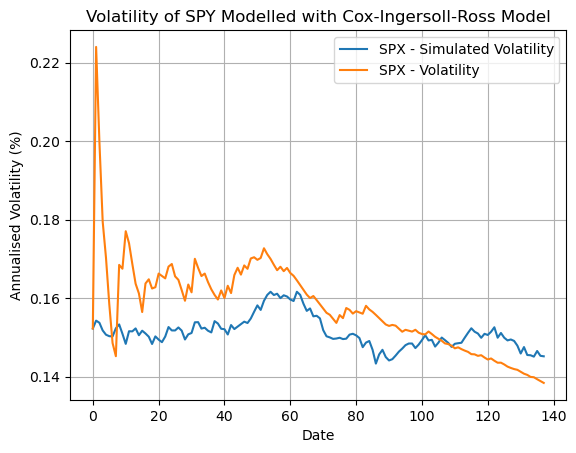

In [44]:
# Compute annualised volatility
annualised_vol = compute_annualised_volatility(prices)

# Initialising volatility process
vol_process = VasicekProcess(initial_price = annualised_vol[0], tau = len(annualised_vol)/252, n_steps = len(annualised_vol))


# Fitting by all different methods
fitting_methods = ['moments', 'least square', 'mle']
params = {method: vol_process.fit(annualised_vol, method = method) for method in fitting_methods}

for method in fitting_methods:
    print(f'{method} Parameters: kappa = {params[method][0]}, theta = {params[method][1]}, sigma = {params[method][2]}')


# Initialising and fitting volatility model
params = vol_process.fit(annualised_vol, method = 'mle')
print(f"kappa: {params[0]}, theta: {params[1]}, sigma: {params[2]}")

# Simulating volatility process
vol_process.simulate()
vol_simulation = vol_process.get_simulation()

# Plotting simulated volatility process
plt.plot(vol_simulation, label = 'SPX - Simulated Volatility')
plt.plot(annualised_vol, label = 'SPX - Volatility')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Annualised Volatility (%)")
plt.title("Volatility of SPY Modelled with Cox-Ingersoll-Ross Model")
plt.grid()

<h2> 5.0 Simulating SPY with Heston Model </h2>

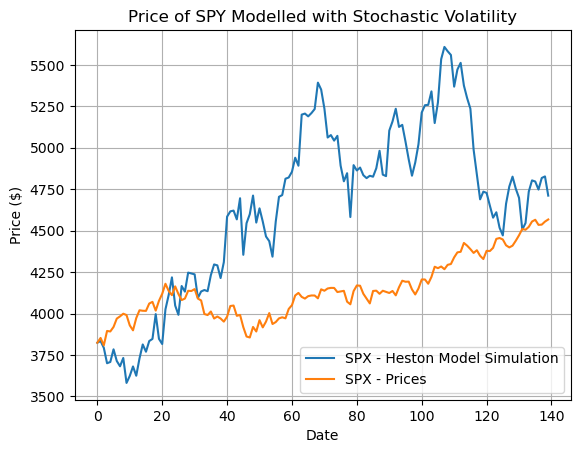

In [43]:
# Ensuring prices and volatility are in the same shape
prices = prices[:len(annualised_vol)]

# Initialising and fitting Heston's model
heston_model = StochasticVolatility(initial_price = prices[0], tau = len(prices)/252, n_steps = len(prices), volatility_process = vol_process)
heston_model.fit(data=prices, method='least square')

# Simulating Heston's model
heston_model.simulate()
heston_simulation = heston_model.get_simulation()

# Plotting simmulation
plt.plot(heston_simulation, label = 'SPX - Heston Model Simulation')
plt.plot(prices, label = 'SPX - Prices')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Price of SPY Modelled with Stochastic Volatility")
plt.grid()